In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import os
import glob
import matplotlib.pyplot as plt
import math
import cv2


%matplotlib inline

In [2]:
def sum(arr):
    """returns sum and no. of pixels between 20 and 240"""
    sum = 0
    count = 0
    for i in arr:
        for j in i:
            if(j>20 and j<240): #only pixels whose value is between 20 and 240
                sum+=j
                count+=1

    return (sum,count)

In [3]:
def sum2(arr):

    shape = arr.shape
    arr = arr[arr>20]
    arr = arr[arr<240]

    return (arr.sum(), arr.size)

In [4]:
img = cv2.imread("try.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [5]:
r,g,b = cv2.split(img)

In [24]:
sum2(r)[0] + sum2(g)[0] + sum2(b)[0]

15696879

In [25]:
sum2(r)[1] + sum2(g)[1] + sum2(b)[1]

154959

In [26]:
sum2(img)

(15696879, 154959)

In [8]:
def sum3(img):
    r_sum = g_sum = b_sum = rg_sum = count = 0
    for i in img:
        for j in i:
            if (j[0] > 20 and j[0] < 240 and j[1] > 20 and j[1] < 240 and j[2] > 20 and j[2] < 240):
                r_sum += j[0]
                g_sum += j[1]
                b_sum += j[2]
                rg_sum += j[0] - j[1]
                count += 1

    return (r_sum,g_sum,b_sum,rg_sum,count)

In [43]:
sum3(img)

(7947054, 3631418, 3858598, 4315636, 51085)

In [44]:
def sum4(img):
    img = img[img[:][:] > 20]
    img = img[img[:][:] < 240]

    return img

In [45]:
img4 = sum4(img)

In [46]:
img4.shape

(154959,)

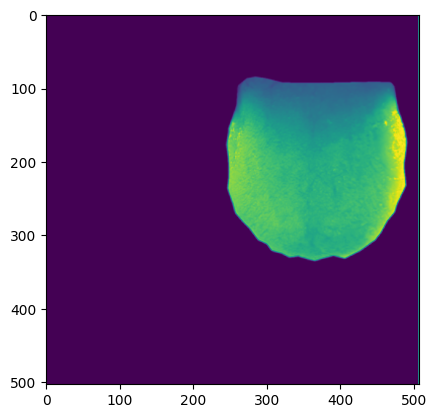

In [36]:
plt.imshow(r)

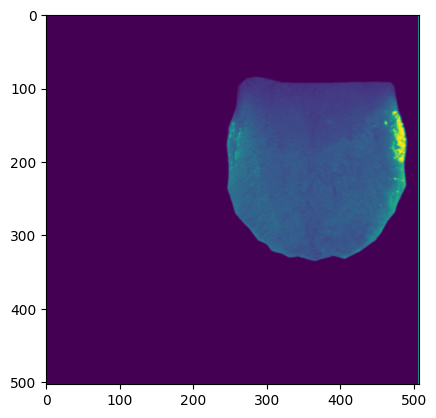

In [37]:
plt.imshow(g)

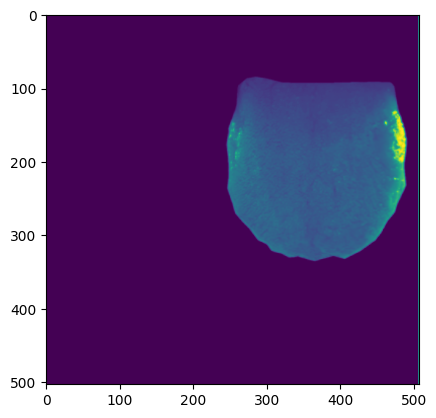

In [38]:
plt.imshow(b)

In [6]:
import time

In [12]:
curr = time.time()
print(sum3(img))
print(time.time()-curr)

(7947054, 3631418, 3858598, 4315636, 51085)
3.0475447177886963


In [25]:
# Assuming img is a 3D NumPy array with shape (height, width, 3) representing an RGB image
def calculate_rgb_sums(img):
    # Create a boolean mask where each pixel is within the specified RGB range
    mask = (img[:, :, 0] > 20) & (img[:, :, 0] < 240) & \
           (img[:, :, 1] > 20) & (img[:, :, 1] < 240) & \
           (img[:, :, 2] > 20) & (img[:, :, 2] < 240)

    # Use the mask to filter the pixels within the specified RGB range
    filtered_pixels = img[mask]

    # Calculate the sums of the RGB values for the filtered pixels
    sum_r = np.sum(filtered_pixels[:, 0])
    sum_g = np.sum(filtered_pixels[:, 1])
    sum_b = np.sum(filtered_pixels[:, 2])

    return sum_r, sum_g, sum_b, np.count_nonzero(filtered_pixels[:, 0])

# Example usage:
# img = np.random.randint(0, 255, (100, 100, 3))  # Example image with random RGB values
# sum_r, sum_g, sum_b = calculate_rgb_sums(img)
# print(sum_r, sum_g, sum_b)


In [26]:
curr = time.time()
print(calculate_rgb_sums(img))
print(time.time()-curr)

(7947054, 3631418, 3858598, 51085)
0.016511917114257812
